In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [98]:
RESULTS_DIR = "results/2025_08_10_161317_(20ep_500h_10-10d_4k_0.05e_0.00a_0.99g)" # Adjust to your results directory

print("Loading:", RESULTS_DIR + "/experiment_summary.csv")

Loading: results/2025_08_10_161317_(20ep_500h_10-10d_4k_0.05e_0.00a_0.99g)/experiment_summary.csv


In [99]:
summary = pd.read_csv(f"{RESULTS_DIR}/experiment_summary.csv")
display(summary.head())

,variant,seed,episode,return
0,Fixed,10,1,-5268.199690
1,Fixed,10,2,20806.566169
2,Fixed,10,3,8566.394870
3,Fixed,10,4,6358.121586
4,Fixed,10,5,14667.358420


## Mean Discounted Return pro Episode

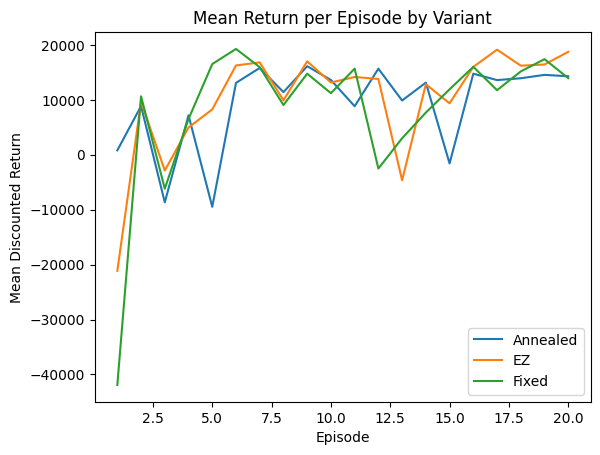

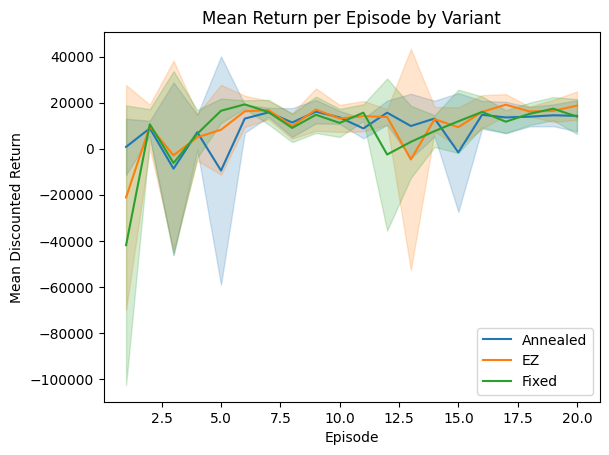

In [100]:

plt.figure()
for variant, grp in summary.groupby("variant"):
    mean_ret = grp.groupby("episode")["return"].mean()
    plt.plot(mean_ret.index, mean_ret.values, label=variant)
plt.xlabel("Episode")
plt.ylabel("Mean Discounted Return")
plt.title("Mean Return per Episode by Variant")
plt.legend()
plt.show()

fig, ax = plt.subplots()

for variant, grp in summary.groupby("variant"):
    by_ep = grp.groupby("episode")["return"]
    mean = by_ep.mean().sort_index()
    std = by_ep.std().reindex(mean.index).fillna(0)
    n = by_ep.count().reindex(mean.index).fillna(1)
    sem = std / np.sqrt(n)
    lo = mean - 1.96 * sem
    hi = mean + 1.96 * sem

    line, = ax.plot(mean.index, mean.values, label=variant)
    color = line.get_color()  # gleiche Farbe wie die Linie
    ax.fill_between(mean.index, lo, hi, alpha=0.2, color=color)


ax.set_xlabel("Episode")
ax.set_ylabel("Mean Discounted Return")
ax.set_title("Mean Return per Episode by Variant")
ax.legend()
plt.show()

## Return-Distributions

<Figure size 640x480 with 0 Axes>

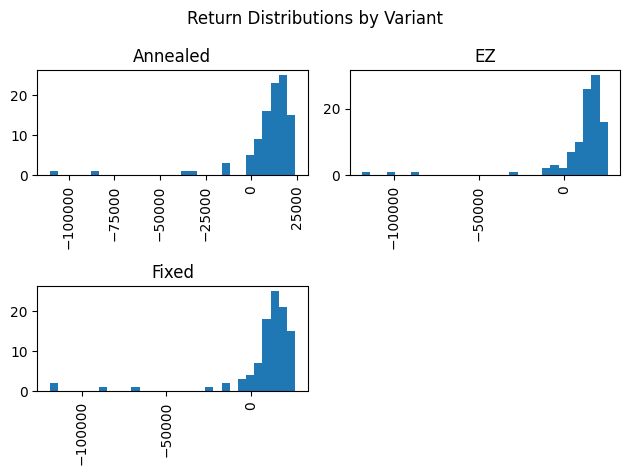

In [101]:
plt.figure()
summary.hist(column="return", by="variant", bins=30)
plt.suptitle("Return Distributions by Variant")
plt.tight_layout()
plt.show()

## Risk, Age & Region Distribution

In [102]:
summary = pd.read_csv(f"{RESULTS_DIR}/experiment_summary.csv")
variants = summary["variant"].unique()
seeds    = summary["seed"].unique()


>>> Sample der angenommenen Profiles für Variante 'Fixed':
   episode  step  profile_idx  action  age  region  risk_score
0        1    13         1692       1   29       4    0.544003
1        1   107          656       1   43       4    0.519514
2        1   134         1686       1   39       3    0.831794
3        1   137         2755       1   24       4    0.303450
4        1   146         2924       1   25       0    0.687378 



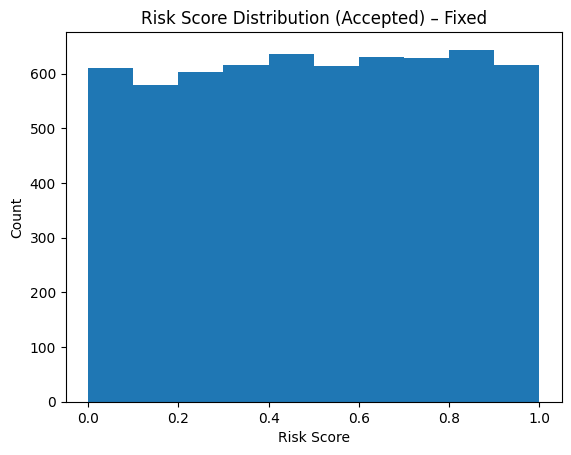

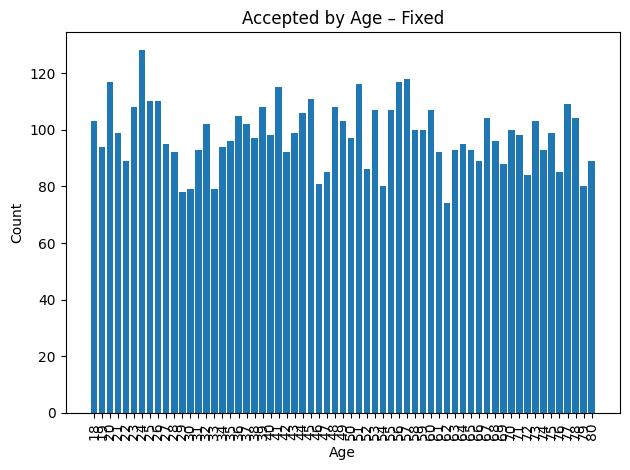

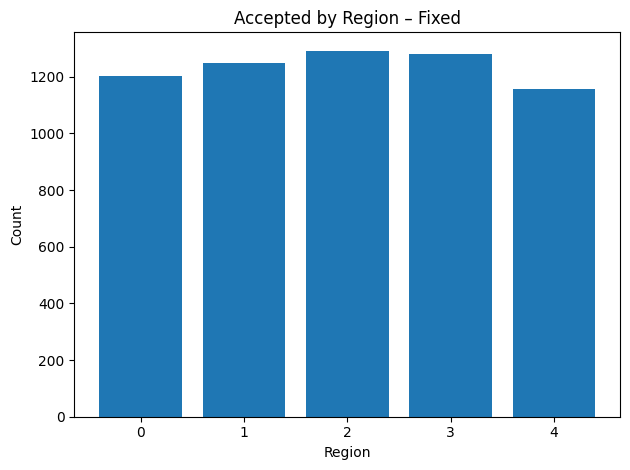


>>> Sample der angenommenen Profiles für Variante 'EZ':
   episode  step  profile_idx  action  age  region  risk_score
0        1   155         2334       1   68       3    0.748404
1        1   161         2233       1   56       0    0.478997
2        1   162         1578       1   62       1    0.043196
3        1   163          329       1   44       4    0.388910
4        1   164         1041       1   27       4    0.252645 



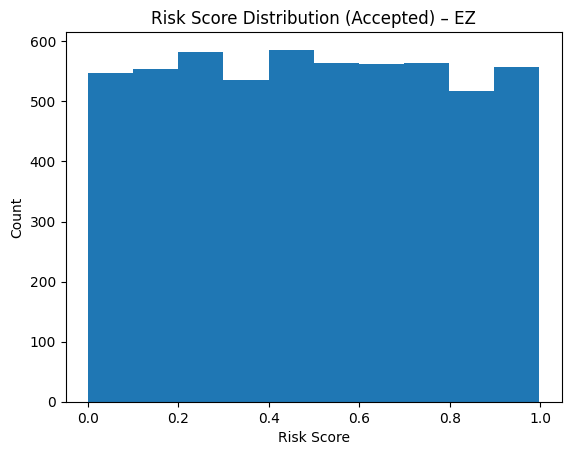

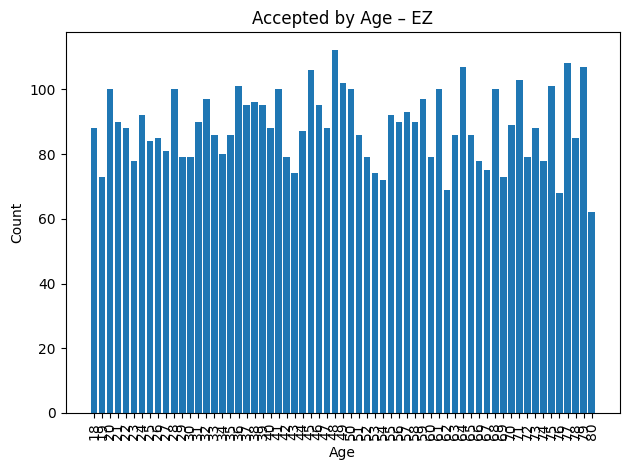

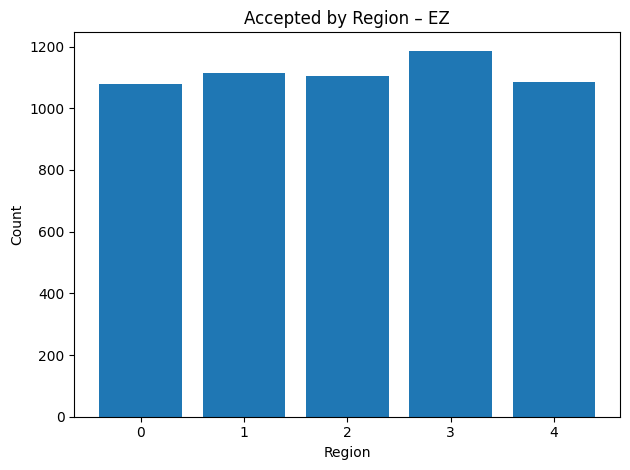


>>> Sample der angenommenen Profiles für Variante 'Annealed':
   episode  step  profile_idx  action  age  region  risk_score
0        1     3         1158       1   28       1    0.536007
1        1     5          256       1   43       3    0.213544
2        1     7         2556       1   29       3    0.869193
3        1    11         1025       1   32       2    0.333358
4        1    12         1278       1   22       2    0.420340 



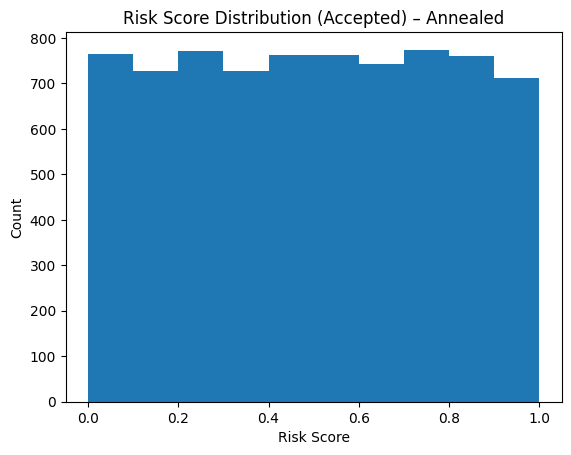

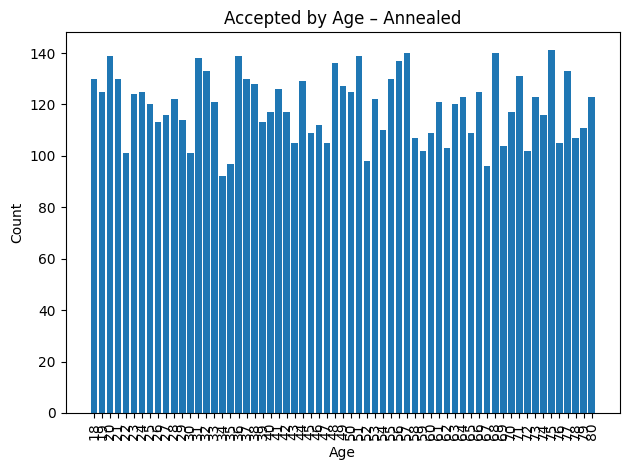

KeyboardInterrupt: 

In [103]:
for variant in variants:
    # Liste sammeln über alle Seeds
    accepted_all = []
    for seed in seeds:
        # Profile und Aktionen pro Run laden
        prof_df = pd.read_csv(f"{RESULTS_DIR}/profiles_{variant}_{seed}.csv")
        act_df  = pd.read_csv(f"{RESULTS_DIR}/actions_{variant}_{seed}.csv")
        # Mergen, dann nur Akzeptierte filtern
        merged  = act_df.merge(prof_df, on="profile_idx")
        accepted = merged[merged["action"] == 1]
        accepted_all.append(accepted)
    # Alles zusammenführen
    accepted_df = pd.concat(accepted_all, ignore_index=True)
    
    # ---- Ausgabe: Sample-Tabelle ----
    print(f"\n>>> Sample der angenommenen Profiles für Variante '{variant}':")
    print(accepted_df.head(), "\n")

    # ---- Plot 1: Risikoscore-Verteilung ----
    plt.figure()
    plt.hist(accepted_df["risk_score"], bins=10)
    plt.title(f"Risk Score Distribution (Accepted) – {variant}")
    plt.xlabel("Risk Score")
    plt.ylabel("Count")
    plt.show()

    # ---- Plot 2: Akzeptanzen nach Alter ----
    plt.figure()
    age_counts = accepted_df["age"].value_counts().sort_index()
    plt.bar(age_counts.index.astype(str), age_counts.values)
    plt.title(f"Accepted by Age – {variant}")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # ---- Plot 3: Akzeptanzen nach Region ----
    plt.figure()
    region_counts = accepted_df["region"].value_counts().sort_index()
    plt.bar(region_counts.index.astype(str), region_counts.values)
    plt.title(f"Accepted by Region – {variant}")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
# from pathlib import Path

# root = Path("results") if Path("results").exists() else Path("result")

# for run_dir in sorted(p for p in root.iterdir() if p.is_dir()):
#     print(f"\n=== {run_dir.name} ===")
#     summary = pd.read_csv(f"results/{run_dir.name}/experiment_summary.csv")
#     display(summary.head())
#     plt.figure()
#     for variant, grp in summary.groupby("variant"):
#         mean_ret = grp.groupby("episode")["return"].mean()
#         plt.plot(mean_ret.index, mean_ret.values, label=variant)
#     plt.xlabel("Episode")
#     plt.ylabel("Mean Discounted Return")
#     plt.title("Mean Return per Episode by Variant")
#     plt.legend()
#     plt.show()